In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("divorce.csv", sep = ";")
weights = {0: 2, 1: 1, 2: 1, 3: -1, 4: -2}

# Apply weights to the features
weighted_df = df.copy()
for column in df.columns:
    if column != 'Class':
        weighted_df[column] = df[column].map(weights)

X = np.array(weighted_df.drop(['Class'], 1))
y = np.array(weighted_df['Class'])

C:\Users\ajed8\AppData\Local\Temp\ipykernel_3956\3615515269.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(weighted_df.drop(['Class'], 1))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9764705882352942


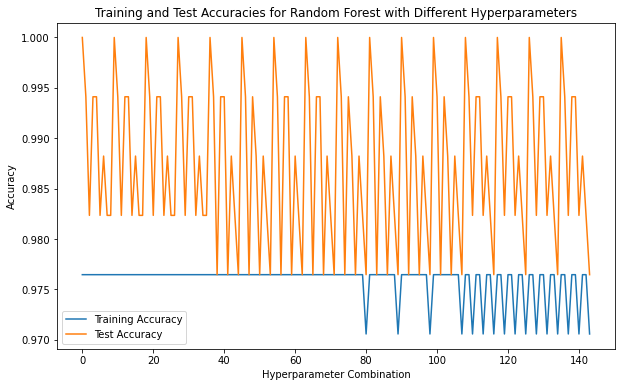

In [3]:
# Define the parameter grid for grid search
param_grid = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create the Random Forest classifier
rf = RandomForestClassifier(random_state=0)

# Perform grid search with cro~ss-validation
grid_search = GridSearchCV(rf, param_grid, cv=10)
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Initialize lists to store training and test accuracies
training_accuracy = []
test_accuracy = []

# Iterate over different values of n_estimators
for n_estimators in param_grid['n_estimators']:
    # Iterate over different values of max_depth
    for max_depth in param_grid['max_depth']:
        # Iterate over different values of min_samples_split
        for min_samples_split in param_grid['min_samples_split']:
            # Iterate over different values of min_samples_leaf
            for min_samples_leaf in param_grid['min_samples_leaf']:
                # Create a Random Forest classifier with current hyperparameters
                rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                            min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                            random_state=0)

                # Perform 10-fold cross-validation
                scores = cross_val_score(rf, X, y, cv=10)

                # Record average training set accuracy
                training_accuracy.append(np.mean(scores))

                # Fit the model on the entire dataset
                rf.fit(X, y)

                # Record test set accuracy
                test_accuracy.append(rf.score(X, y))

best_rf = grid_search.best_estimator_

# Plot the training and test accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(len(training_accuracy)), training_accuracy, label="Training Accuracy")
plt.plot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")
plt.xlabel("Hyperparameter Combination")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracies for Random Forest with Different Hyperparameters")
plt.legend()
plt.show()


C:\Users\ajed8\AppData\Local\Temp\ipykernel_3956\3483111923.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  plot_tree(tree, feature_names=weighted_df.drop(['Class'], 1).columns, filled=True, ax=ax, fontsize=50)


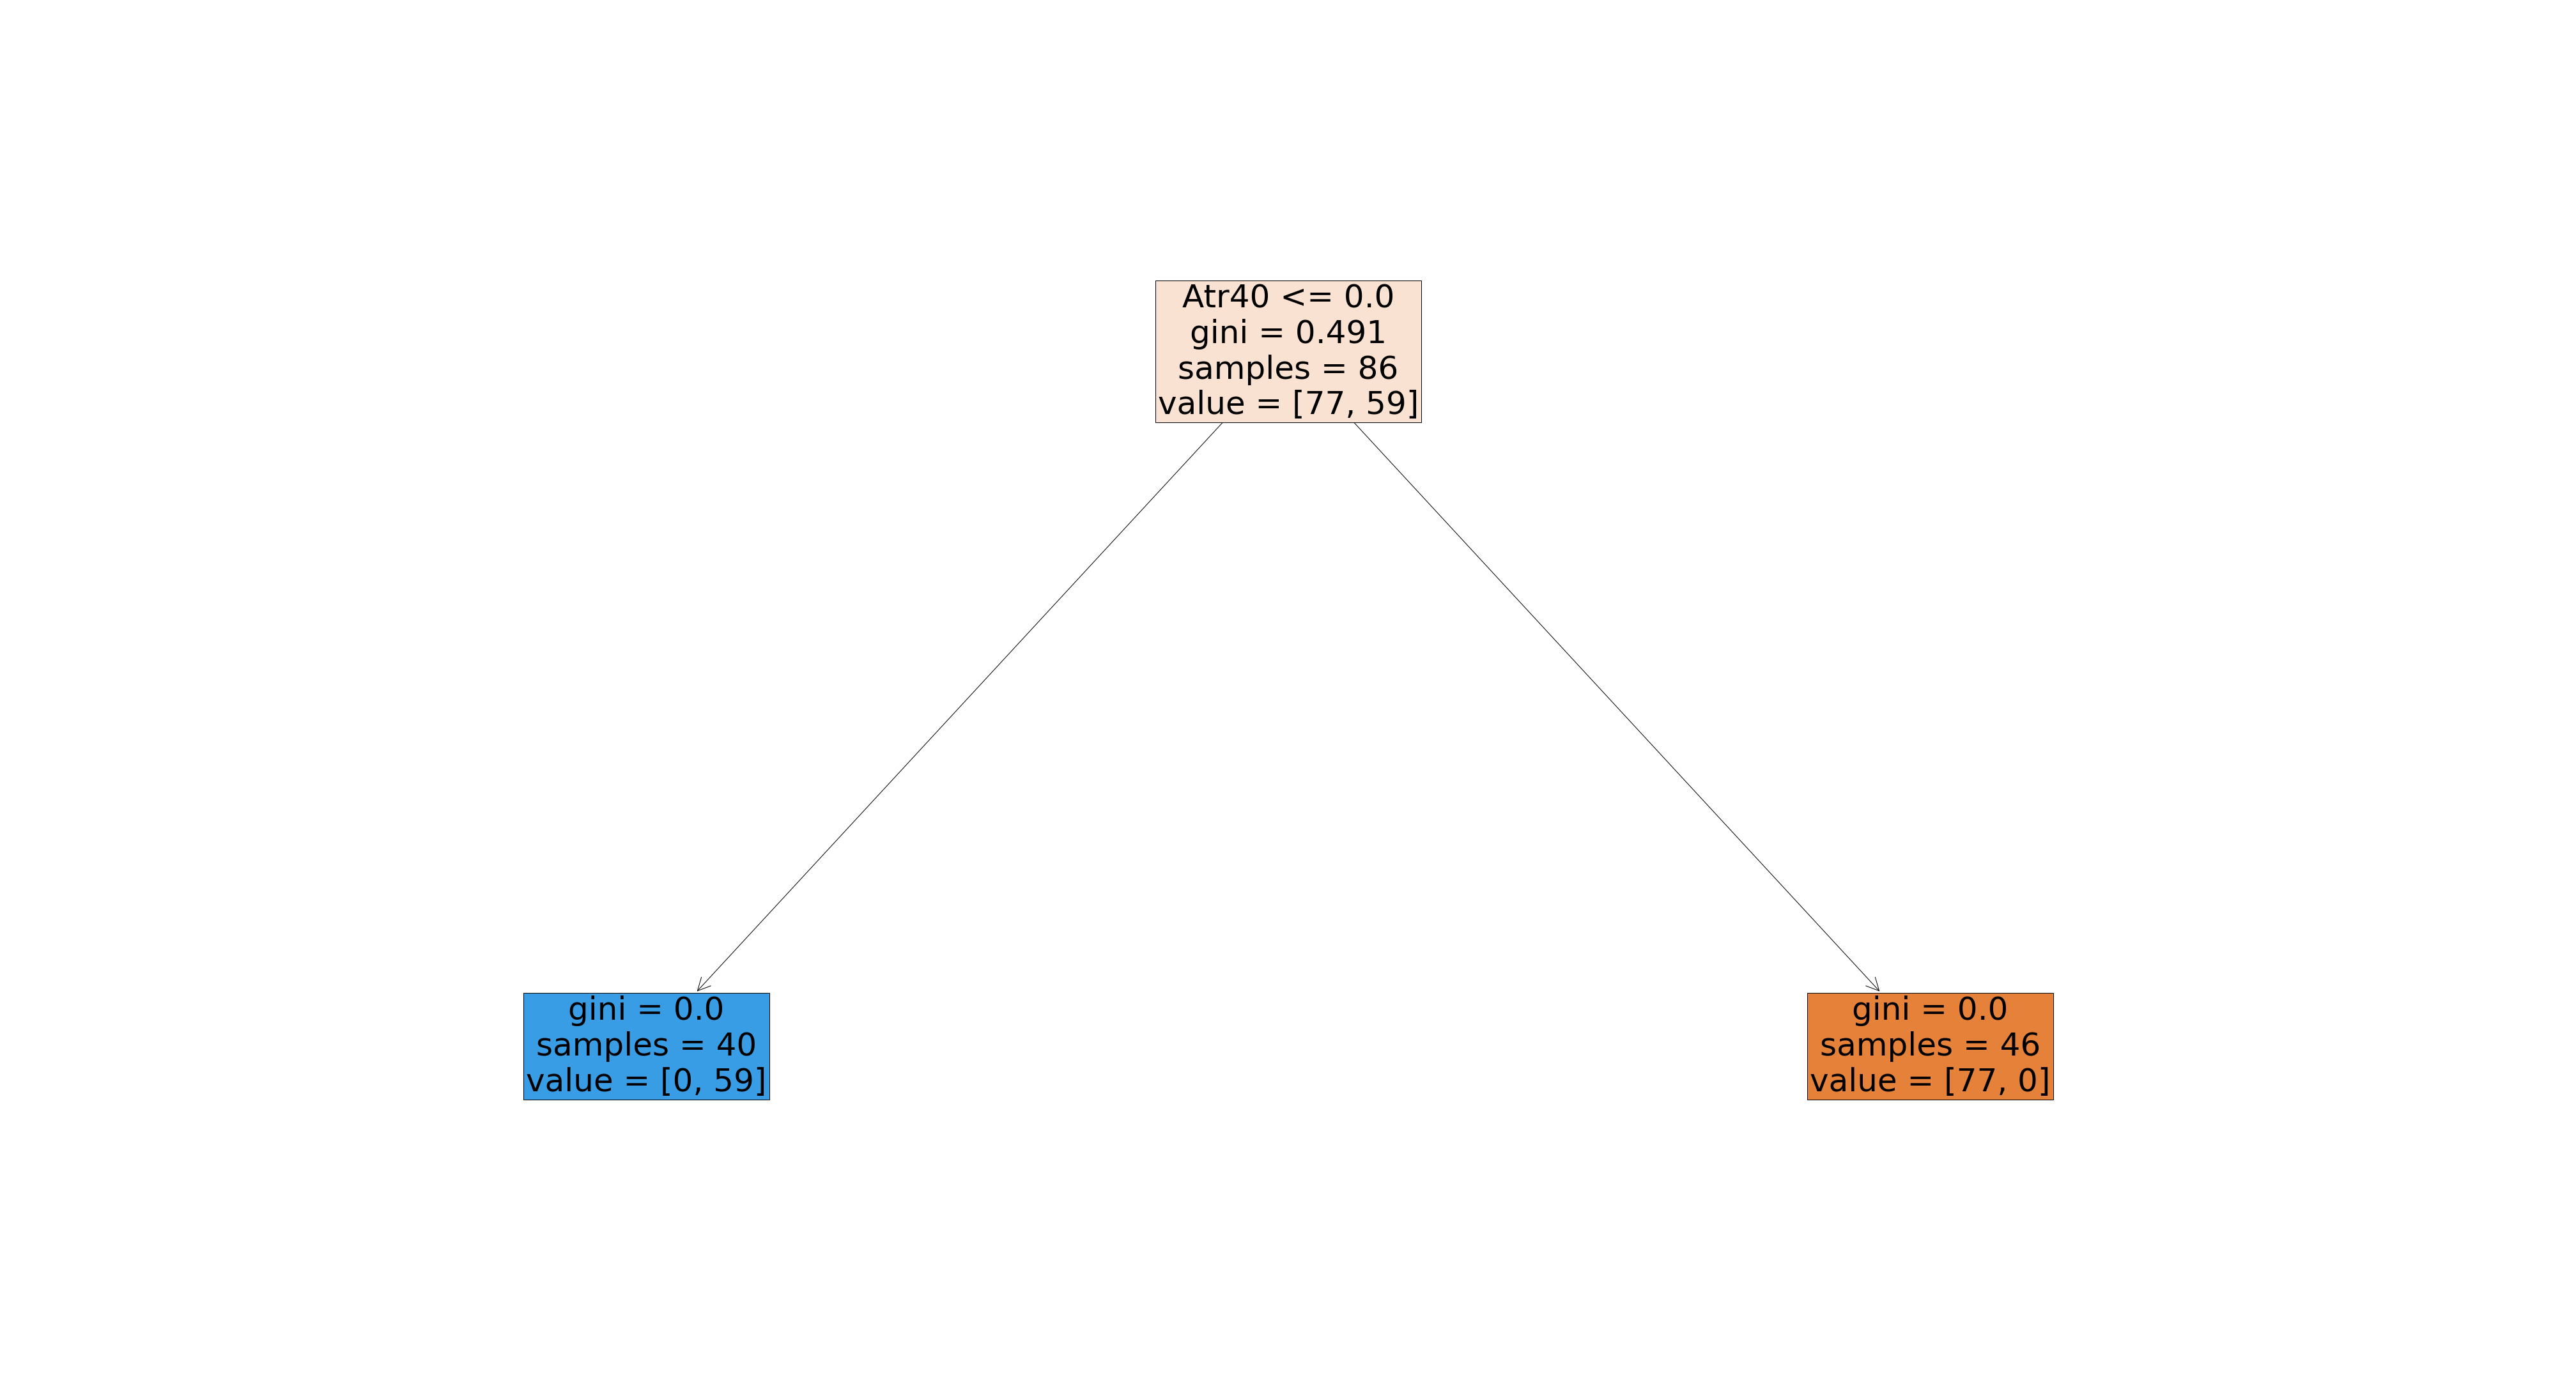

<Figure size 432x288 with 0 Axes>

In [18]:
from sklearn.tree import plot_tree

# Extract a single decision tree from the Random Forest
tree = best_rf.estimators_[0]

# Plot the decision tree in full screen
fig, ax = plt.subplots(figsize=(72, 40))
plot_tree(tree, feature_names=weighted_df.drop(['Class'], 1).columns, filled=True, ax=ax, fontsize=50)
plt.show()
plt.savefig("decision_tree.png")

C:\Users\ajed8\AppData\Local\Temp\ipykernel_3956\2853602077.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  feature_names = weighted_df.drop(['Class'], 1).columns


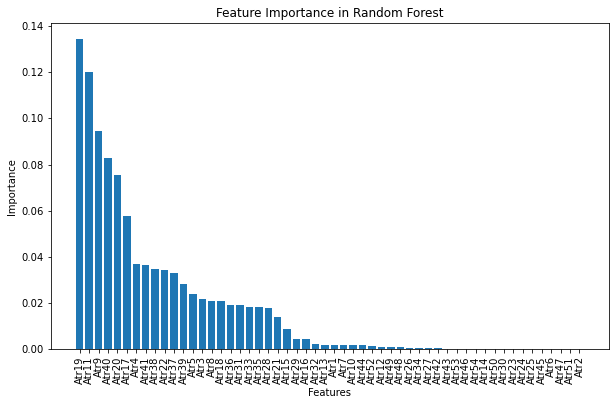

In [10]:
# Get feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature indices in descending order

# Get feature names
feature_names = weighted_df.drop(['Class'], 1).columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

In [19]:
# Sort feature importances and feature names in descending order
indices = np.argsort(best_rf.feature_importances_)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_feature_importances = best_rf.feature_importances_[indices]

# Calculate cumulative importance
cumulative_importance = np.cumsum(sorted_feature_importances)

# Print feature names and cumulative importance scores
for feature_name, importance_score, cumulative_score in zip(sorted_feature_names, sorted_feature_importances, cumulative_importance):
    print(f"{feature_name}: Importance = {importance_score:.4f}, Cumulative Importance = {cumulative_score:.4f}")


Atr19: Importance = 0.1345, Cumulative Importance = 0.1345
Atr11: Importance = 0.1199, Cumulative Importance = 0.2544
Atr9: Importance = 0.0946, Cumulative Importance = 0.3490
Atr40: Importance = 0.0831, Cumulative Importance = 0.4321
Atr20: Importance = 0.0755, Cumulative Importance = 0.5076
Atr17: Importance = 0.0579, Cumulative Importance = 0.5655
Atr4: Importance = 0.0370, Cumulative Importance = 0.6025
Atr41: Importance = 0.0364, Cumulative Importance = 0.6389
Atr38: Importance = 0.0349, Cumulative Importance = 0.6738
Atr22: Importance = 0.0344, Cumulative Importance = 0.7082
Atr37: Importance = 0.0332, Cumulative Importance = 0.7413
Atr39: Importance = 0.0283, Cumulative Importance = 0.7696
Atr5: Importance = 0.0238, Cumulative Importance = 0.7935
Atr3: Importance = 0.0218, Cumulative Importance = 0.8153
Atr8: Importance = 0.0210, Cumulative Importance = 0.8363
Atr18: Importance = 0.0210, Cumulative Importance = 0.8573
Atr36: Importance = 0.0193, Cumulative Importance = 0.8766
At

In [20]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest classifier
best_rf.fit(X_train, y_train)


# Evaluate the model on the test set
y_pred = best_rf.predict(X_test)

print("Test Accuracy:", best_rf.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

Test Accuracy: 0.9411764705882353
Classification Report:
              precision    recall  f1-score   support

           0      0.889     1.000     0.941        16
           1      1.000     0.889     0.941        18

    accuracy                          0.941        34
   macro avg      0.944     0.944     0.941        34
weighted avg      0.948     0.941     0.941        34



C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


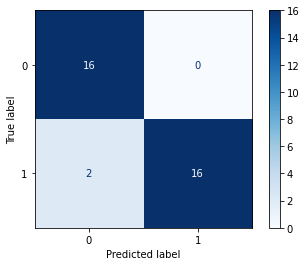

In [21]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_rf, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [20]:
import joblib

joblib.dump(best_rf, 'best_rf_model.pkl')

['best_rf_model.pkl']

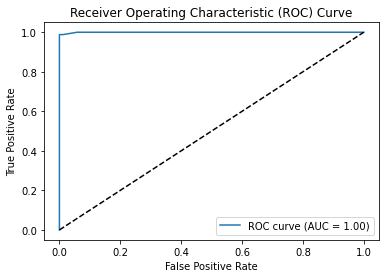

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = best_rf.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [23]:
print(auc)

0.9995847176079734


## Most Important Features

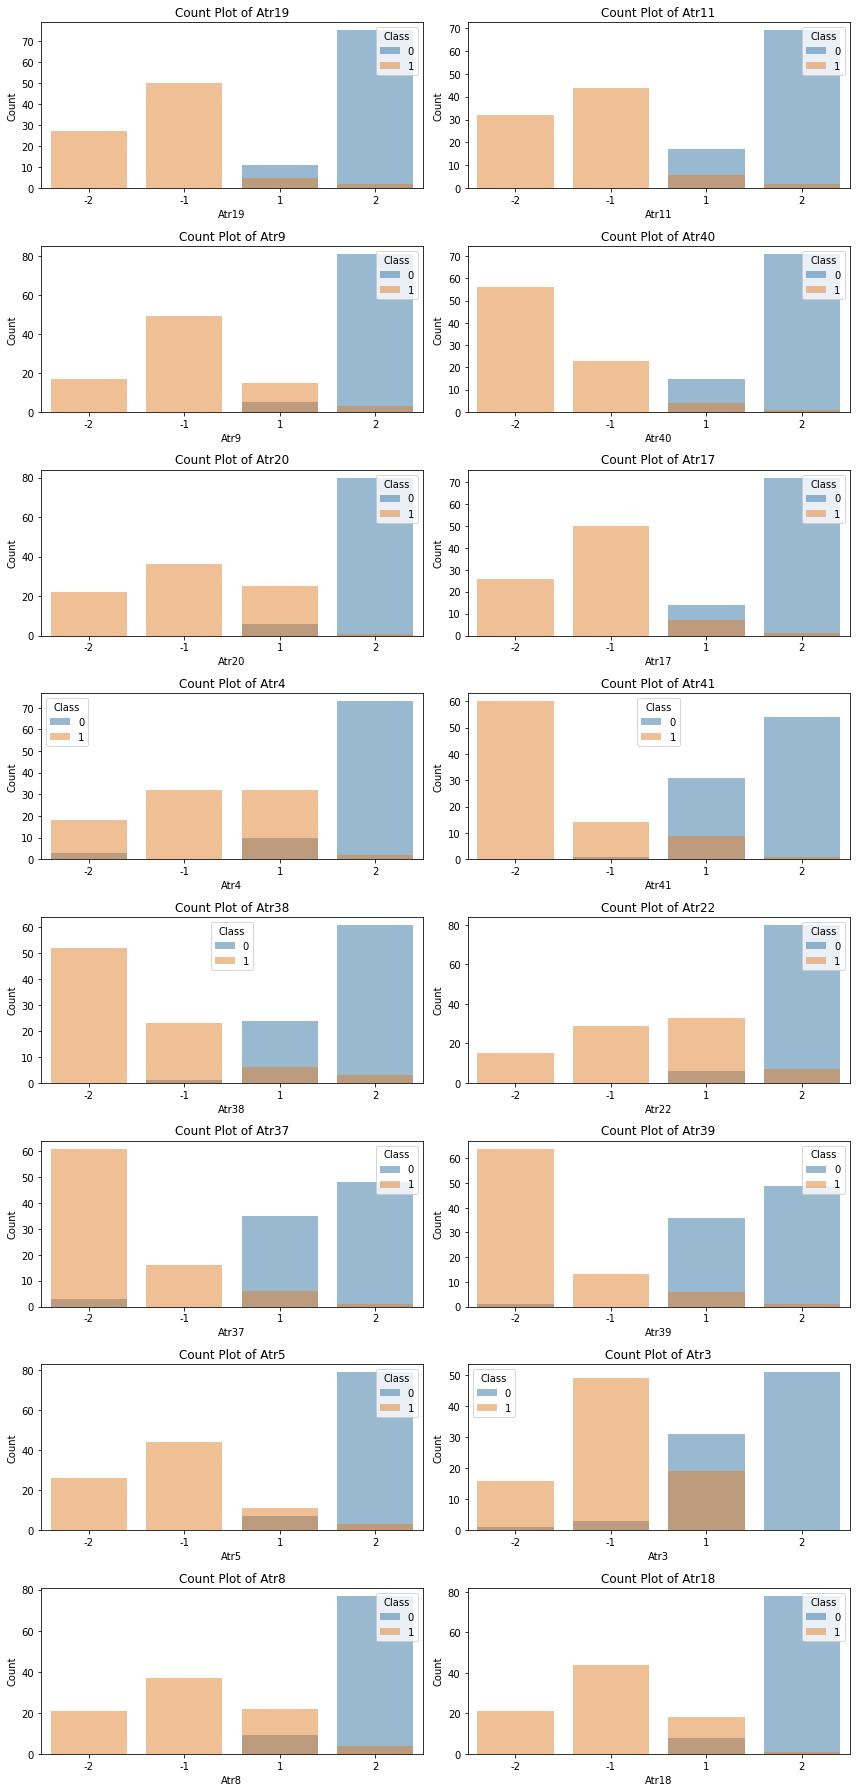

In [27]:
import seaborn as sns
# List of columns
columns_to_plot = ['Atr19', 'Atr11', 'Atr9', 'Atr40', 'Atr20', 'Atr17', 'Atr4', 'Atr41', 'Atr38', 'Atr22', 'Atr37', 'Atr39', 'Atr5', 'Atr3', 'Atr8', 'Atr18']

# Define the number of rows and columns in the grid
num_cols = 2
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create a grid of subplots for count plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 25))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Create count plots for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=weighted_df, x=column, hue='Class', dodge=False, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].grid(False)

# Remove empty subplots if the number of plots is less than the grid size
for j in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust subplot layout
plt.tight_layout()
plt.show()

## Least Important Features

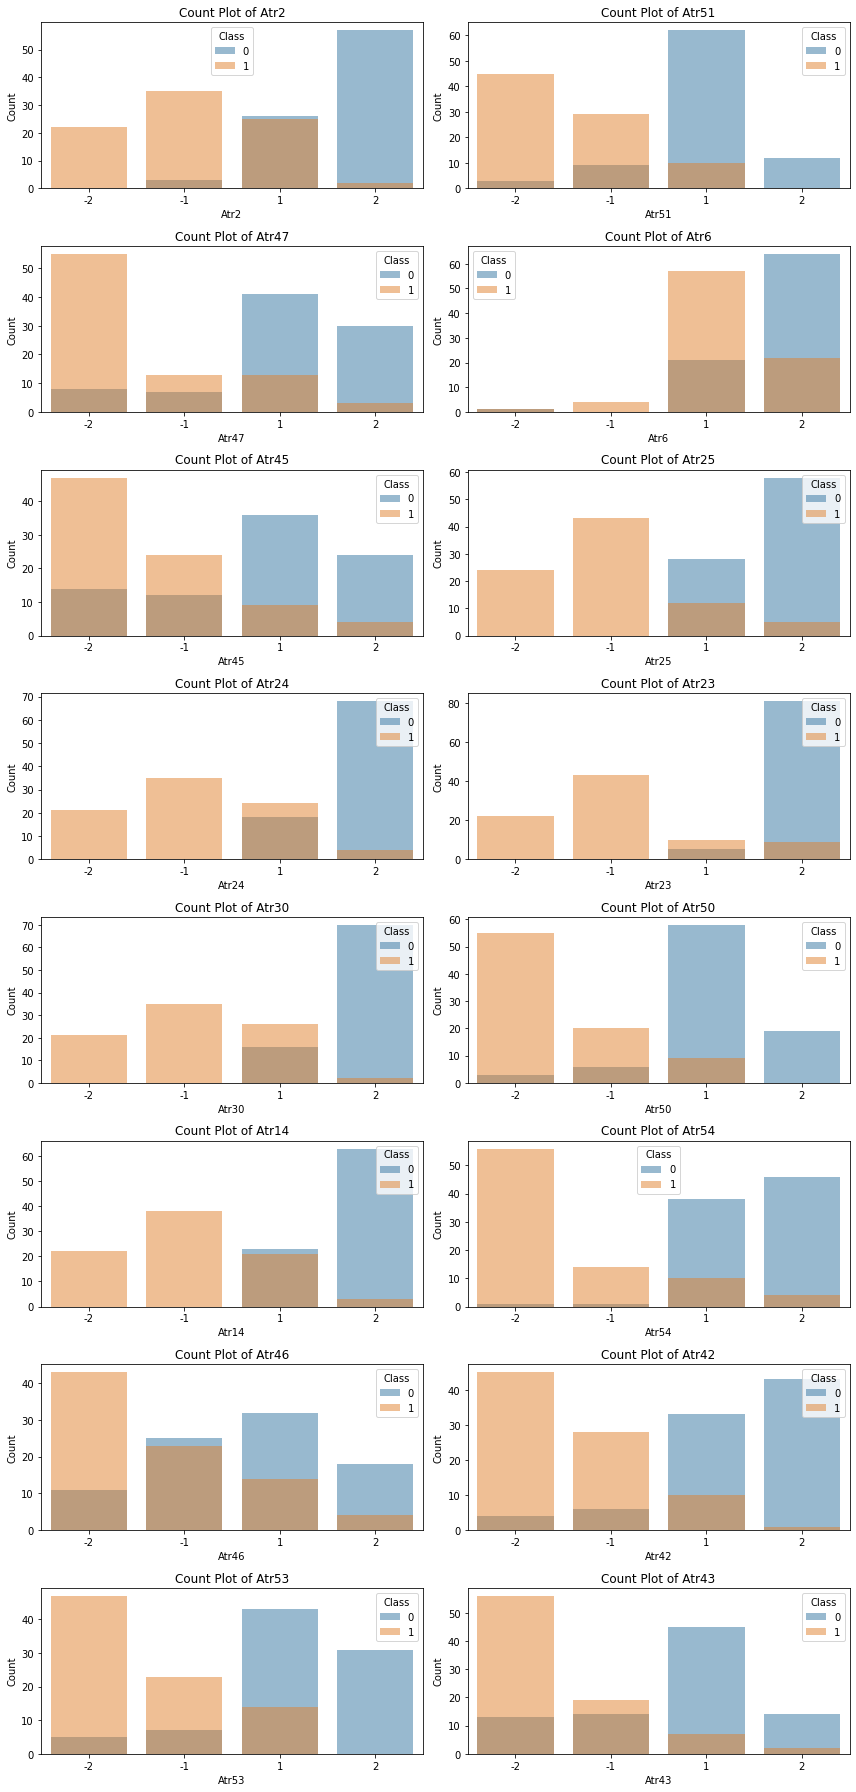

In [29]:
# List of columns you want to create histograms for
columns_to_plot = ['Atr2', 'Atr51', 'Atr47', 'Atr6', 'Atr45', 'Atr25', 'Atr24', 'Atr23', 'Atr30', 'Atr50', 'Atr14', 'Atr54', 'Atr46', 'Atr42', 'Atr53', 'Atr43']

# Define the number of rows and columns in the grid
num_cols = 2
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Create a grid of subplots for count plots (categorical data)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 25))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Create count plots for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=weighted_df, x=column, hue='Class', dodge=False, alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Count Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].grid(False)

# Remove empty subplots if the number of plots is less than the grid size
for j in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust subplot layout
plt.tight_layout()
plt.show()